<a href="https://colab.research.google.com/github/vincimech010233/MachineLearningBasics/blob/master/train_cifar10_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

170498071/170498071 [==============================] - 2s 0us/step
Epoch 1/10
1563/1563 [==============================] - 88s 53ms/step - loss: 1.5230 - accuracy: 0.4483 - val_loss: 1.2900 - val_accuracy: 0.5408
Epoch 2/10
1563/1563 [==============================] - 84s 54ms/step - loss: 1.1694 - accuracy: 0.5848 - val_loss: 1.0947 - val_accuracy: 0.6136
Epoch 3/10
1563/1563 [==============================] - 85s 54ms/step - loss: 1.0160 - accuracy: 0.6414 - val_loss: 1.0346 - val_accuracy: 0.6334
Epoch 4/10
1563/1563 [==============================] - 82s 52ms/step - loss: 0.9290 - accuracy: 0.6720 - val_loss: 0.9431 - val_accuracy: 0.6708
Epoch 5/10
1563/1563 [==============================] - 82s 53ms/step - loss: 0.8492 - accuracy: 0.7010 - val_loss: 0.9263 - val_accuracy: 0.6797
Epoch 6/10
1563/1563 [==============================] - 84s 54ms/step - loss: 0.7908 - accuracy: 0.7242 - val_loss: 0.9009 - val_accuracy: 0.6891
Epoch 7/10
1563/1563 [==============================] - 8

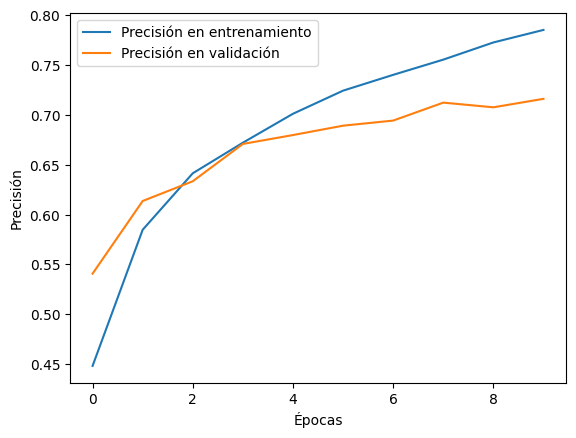

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models, datasets
import matplotlib.pyplot as plt

# Cargar y preprocesar el conjunto de datos CIFAR-10
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()
train_images, test_images = train_images / 255.0, test_images / 255.0

# Definir la arquitectura de la red neuronal convolucional
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10)
])

# Compilar el modelo
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# Entrenar el modelo
history = model.fit(train_images, train_labels, epochs=10,
                    validation_data=(test_images, test_labels))

# Evaluar el modelo
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print(f"Precisión en el conjunto de prueba: {test_acc}")

# Graficar las curvas de entrenamiento y validación
plt.plot(history.history['accuracy'], label='Precisión en entrenamiento')
plt.plot(history.history['val_accuracy'], label='Precisión en validación')
plt.xlabel('Épocas')
plt.ylabel('Precisión')
plt.legend()
plt.show()
